## Preprocessing

In [2]:
import numpy as np
import pandas as pd
import librosa
import os

In [3]:
os.chdir('/Users/hyunwoogu/Documents/AESpronounce/')
PARSE = pd.read_csv('parse.csv')
samples  = [i for i in os.listdir() if 'wav' in i]
samples  = np.sort(np.array(samples))

In [4]:
def MinMaxMean(array):
    Min = np.min(array)
    Max = np.max(array)
    Mean= np.mean(array)
    return(Min, Max, Mean)

In [7]:
features = np.zeros([len(samples), 3*4])

for i in range(len(samples)):
    data, fs= librosa.load(samples[i])
    pitches = librosa.core.piptrack(y=data, sr=fs, fmin=75, fmax=1600)[0]
    pitches = pitches[pitches>0]
    rmse    = librosa.feature.rmse(data)
    rmse    = rmse[rmse>0]
    features[i, 0:3] = MinMaxMean(pitches)
    features[i, 3:6] = MinMaxMean(rmse)
    features[i, 6:9] = MinMaxMean(librosa.feature.mfcc(data))
    features[i, 9:12]= MinMaxMean(librosa.feature.delta(data))

In [8]:
colnames = []

for i in ['Pitch', 'RMSE', 'MFCC', 'Delta']:
    for j in ['Min', 'Max', 'Mean']:
        colnames.append(i + j)

FEAT = pd.DataFrame(features)
FEAT.columns = colnames
DATA = pd.concat([PARSE, FEAT], axis=1)
#DATA[:, 5:16] = pd.DataFrame(features)
#DATA.loc[:,12] = [k.split('.')[0] for k in samples]
#DATA.loc[:,13] = labels[:,0]
#DATA = DATA.loc[:, [12, 13] + [i for i in range(12)]]

#DATA.columns = PARSE.columns.tolist + colnames
DATA.to_csv('records.csv', index=False)

## Visualization

In [2]:
library(tidyverse)
library(gridExtra)
library(ggbiplot)

In [3]:
setwd('/Users/hyunwoogu/Documents/AESpronounce/')
DATA = read.csv('records.csv')

In [34]:
DATAnumeric = DATA[,c(6:8, 9:14)]

Importance of components:
                          PC1    PC2    PC3     PC4     PC5    PC6     PC7
Standard deviation     1.8721 1.3468 1.2448 0.89314 0.76911 0.6335 0.45590
Proportion of Variance 0.3894 0.2016 0.1722 0.08863 0.06573 0.0446 0.02309
Cumulative Proportion  0.3894 0.5910 0.7631 0.85176 0.91749 0.9621 0.98518
                           PC8     PC9
Standard deviation     0.26554 0.25076
Proportion of Variance 0.00783 0.00699
Cumulative Proportion  0.99301 1.00000

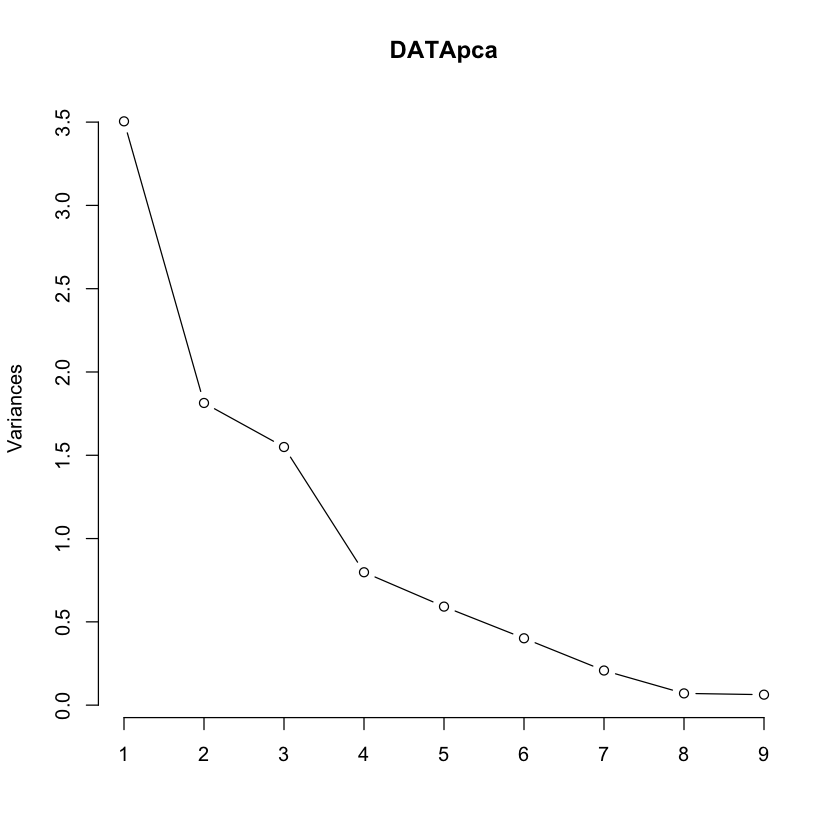

In [43]:
DATApca = prcomp(DATAnumeric, center=T, scale.=T)
temp = DATApca$x
temp[,1] = -temp[,1]
DATApca$x = temp

plot(DATApca, type="l")
summary(DATApca)

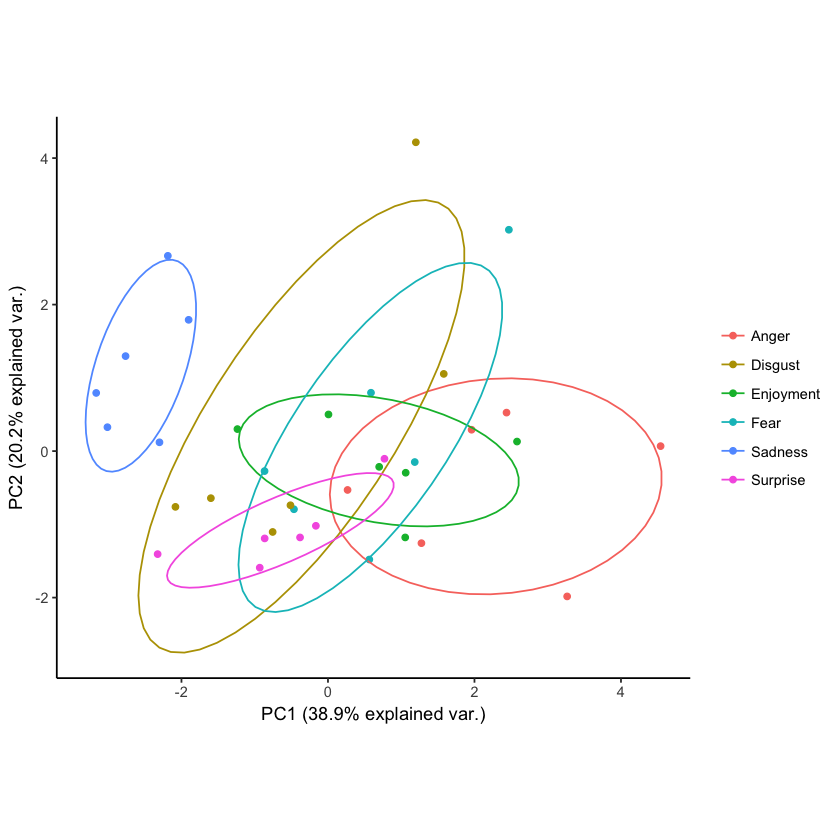

In [44]:
ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATA$Ground.Truth, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    theme_classic()

In [74]:
temp = DATA$Ground.Truth
temp = as.character(temp)
temp[temp=='Surprise'] = 'other'
temp[temp=='Disgust']  = 'other'
temp[temp=='Enjoyment']= 'other'
temp = as.factor(temp)
DATA$GroundTruth = temp

In [75]:
temp = DATA2$Ground.Truth
temp = as.character(temp)
temp[temp=='Surprise'] = 'other'
temp[temp=='Disgust']  = 'other'
temp[temp=='Enjoyment']= 'other'
temp = as.factor(temp)
DATA2$GroundTruth = temp

## Comparison

In [45]:
setwd('/Users/hyunwoogu/Documents/AniEmotionSounds/Numbers/')
DATA2 = read.csv('records.csv')

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.8334 1.3424 1.0684 0.9971 0.78616 0.76122 0.53509
Proportion of Variance 0.3735 0.2002 0.1268 0.1105 0.06867 0.06438 0.03181
Cumulative Proportion  0.3735 0.5737 0.7005 0.8110 0.87965 0.94404 0.97585
                           PC8     PC9
Standard deviation     0.39445 0.24854
Proportion of Variance 0.01729 0.00686
Cumulative Proportion  0.99314 1.00000

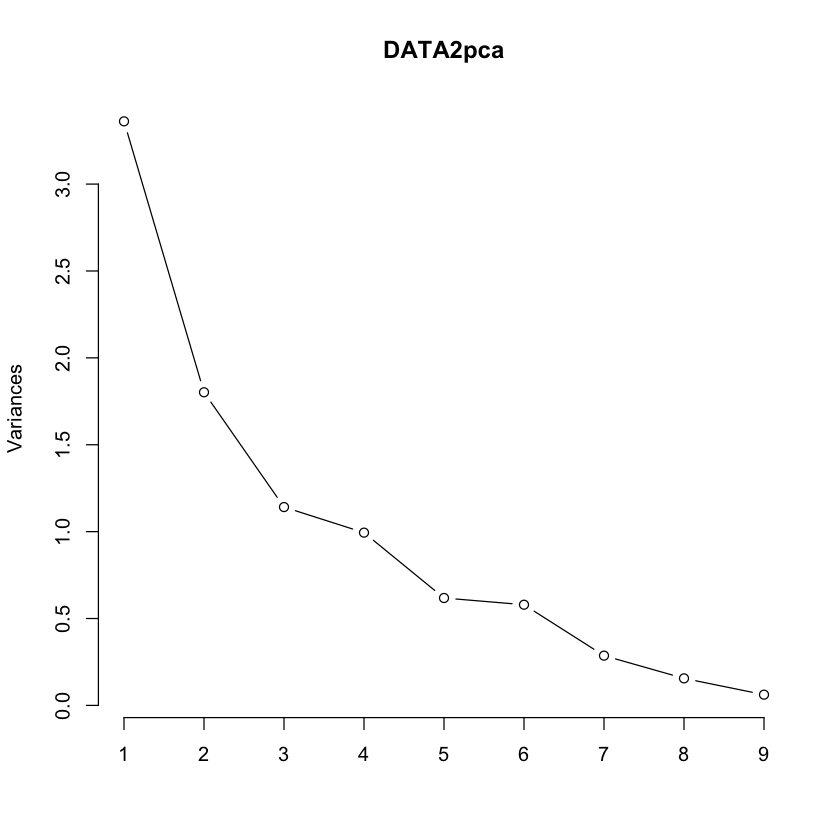

In [46]:
DATA2numeric = DATA2[,c(6:8, 9:14)]
DATA2pca = prcomp(DATA2numeric, center=T, scale.=T)
plot(DATA2pca, type="l")
summary(DATA2pca)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


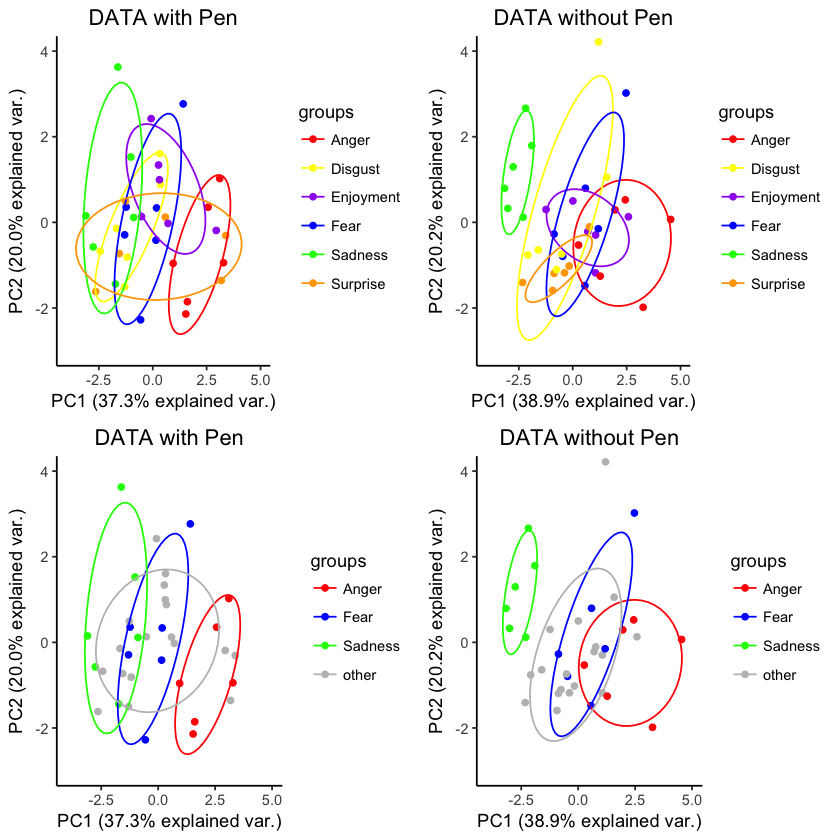

In [82]:
p1=ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATA$GroundTruth, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    coord_cartesian(xlim = c(-4,5), ylim = c(-3,4)) +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    scale_colour_manual(values = c("red", "blue", "green", "grey")) + 
    theme_classic() +
    ggtitle("DATA without Pen") +
    theme(plot.title = element_text(hjust = 0.5))

p2=ggbiplot(DATA2pca, obs.scale = 1, var.scale = 1, 
         groups = DATA2$GroundTruth, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    coord_cartesian(xlim = c(-4,5), ylim = c(-3,4)) +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    scale_colour_manual(values = c("red", "blue", "green", "grey")) + 
    theme_classic() +
    ggtitle("DATA with Pen") +
    theme(plot.title = element_text(hjust = 0.5))

p3=ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATA$Ground.Truth, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    coord_cartesian(xlim = c(-4,5), ylim = c(-3,4)) +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    scale_colour_manual(values = c("red", "yellow", "purple", "blue", "green", "orange")) + 
    theme_classic() +
    ggtitle("DATA without Pen") +
    theme(plot.title = element_text(hjust = 0.5))

p4=ggbiplot(DATA2pca, obs.scale = 1, var.scale = 1, 
         groups = DATA2$Ground.Truth, varname.size=0, var.axes = F, ellipse = TRUE) +  # circle = TRUE #  
    scale_color_discrete(name = '') +
    coord_cartesian(xlim = c(-4,5), ylim = c(-3,4)) +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    scale_colour_manual(values = c("red", "yellow", "purple", "blue", "green", "orange")) + 
    theme_classic() +
    ggtitle("DATA with Pen") +
    theme(plot.title = element_text(hjust = 0.5))


grid.arrange(p4,p3,p2,p1, ncol =2, nrow=2)